#INGESTA DE DATOS E IMPORTACÓN DE LAS LIBRERIAS NECESARIAS

In [3]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#Dataset
Para este notebook se trabajara con un dataset llamado Mushroom Classification, el cual consiste en un dataset de hongos el cual en base a las diferentes caracteristicas de los hogos saber si es comestible o venenoso, para esto vamos a proceder a usar un algoritmo de clasificacíon.

In [4]:
datasetlink = "https://www.kaggle.com/datasets/kwadwoofosu/predict-test-scores-of-students"
od.download(datasetlink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kidkeozz
Your Kaggle Key: ··········


100%|██████████| 21.0k/21.0k [00:00<00:00, 22.0MB/s]

In [5]:
os.chdir("predict-test-scores-of-students")
os.listdir()

['test_scores.csv']

#Damos un pequeño vistazo
Esto para poder entender de una mejor manera con que estamos trabajando, el tipo de datos, el tamaño de los datos, etc.

In [6]:
archivo = 'test_scores.csv'
df = pd.read_csv(archivo)
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [7]:
df.shape

(2133, 11)

In [8]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


#Primeros graficos
Nos sirven para despejar algunas dudas o como en este caso entender algo muy nteresante del datset que son las caracteristicas de pretest y posttest, ya que lo mas comun es que un pretest nos ayude a lograr un mejor puntaje en el test por lo cual puede ser una caracterisca bastante relevante en los datos

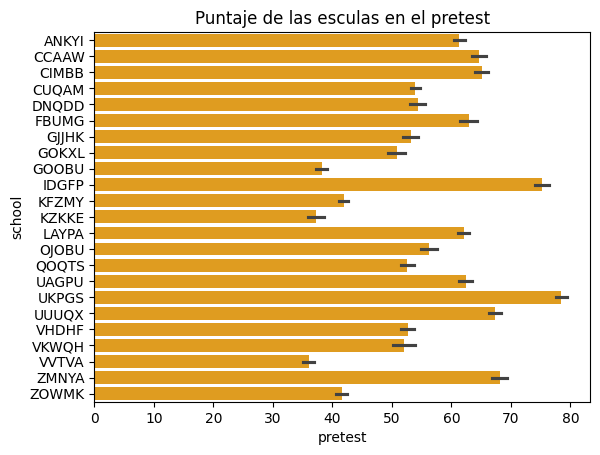

In [9]:
sns.barplot(x=df["pretest"], y=df["school"], color ="orange")
plt.title("Puntaje de las esculas en el pretest")
plt.show()

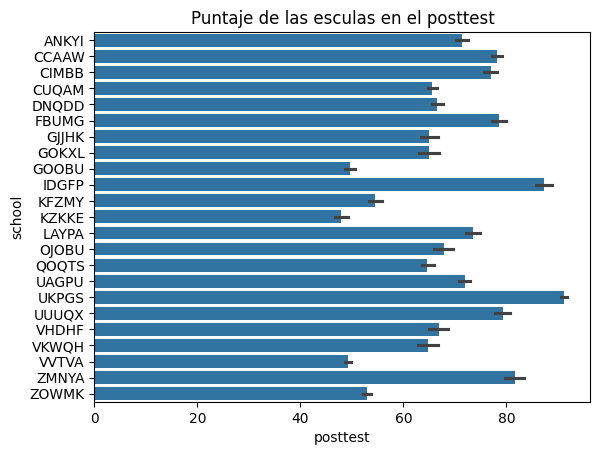

In [10]:
sns.barplot(x=df["posttest"], y=df["school"])
plt.title("Puntaje de las esculas en el posttest")
plt.show()

#Analizamos mas a profundidad los datos:
Esto para extraer datos que pueden ser relevantes en el dataset o para la misma investigacion, nos ayuda a tener una mejor vision de los datos en profundidad

In [11]:
#contamos el numero de estudiantes por escuela
df['school'].value_counts()

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

#Puntade del pretest por cada region
Esto es curioso ya que uno pensaria que las escuales que tiende a ubicarse en la zona urbana tendrian un mejor puntaje, sin embargo vemos una distribucion interesante.

Text(0.5, 1.0, 'puntaje pretest por region')

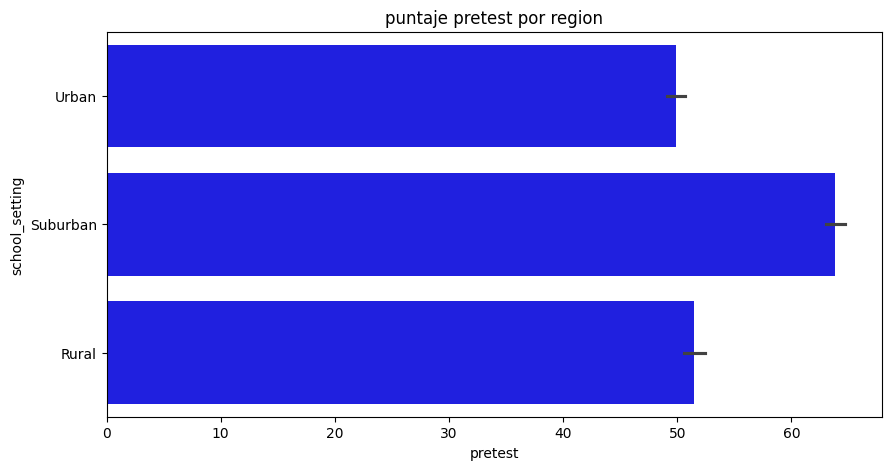

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(data= df,  y = 'school_setting', x ="pretest" , estimator=np.mean, color = 'Blue')
plt.title('puntaje pretest por region')

In [12]:
promedio_pretest_por_region=df.groupby("school_setting")['pretest'].mean()
promedio_pretest_por_region

school_setting
Rural       51.490196
Suburban    63.841004
Urban       49.875276
Name: pretest, dtype: float64

#Puntade del posttest por cada region:
Esto nos deja ver algo interesante y es que aunque los puntajes gratificamente suban, podemos ver que aun se mantiene una distribucion similar a la del pretest, ademas de como sabemos un pretest nos puede ayudar a mejorar nuestro puntaje en el posttest

Text(0.5, 1.0, 'puntaje posttest por region')

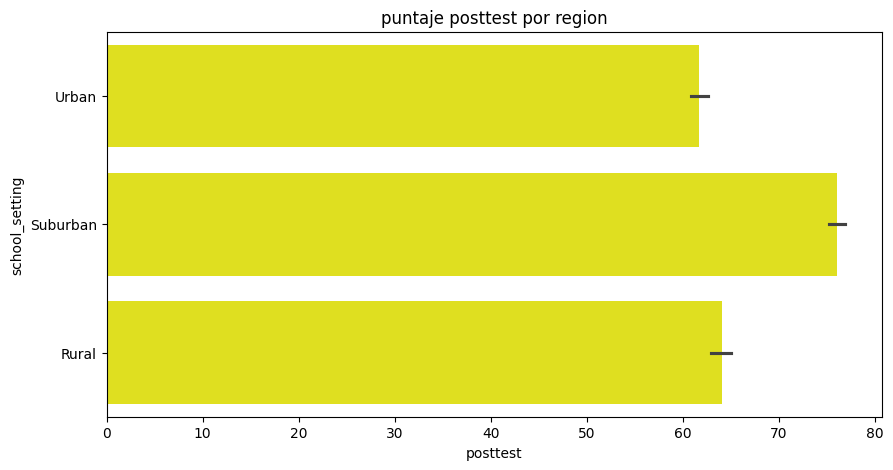

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(data= df,  y = 'school_setting', x ="posttest" , estimator=np.mean, color = 'yellow')
plt.title('puntaje posttest por region')

In [57]:
promedio_posttest_por_region=df.groupby("school_setting")['posttest'].mean()
promedio_posttest_por_region

school_setting
Rural       64.050980
Suburban    76.037657
Urban       61.748344
Name: posttest, dtype: float64

In [14]:
df = df.drop(columns=['student_id','classroom'])

In [15]:
df

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,Standard,30.0,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,Standard,30.0,Male,Qualifies for reduced/free lunch,46.0,53.0


#Preprocesamiento
Dividimos los datos en numericos y categoricos para poder aplicar el algoritmo de preprocesamiento label encoder que lo que va a hacer es convertir cada categoria en un numero entero que represente esa categoria y esto para todas las columnas del dataset X, esto para que el algoritmo pueda funcionar de una manera optima, y al final solo unimos denuevo el dataset.

In [16]:
df_num = df[['n_student','pretest','posttest']]
df_char = df.drop(columns=['n_student','pretest','posttest'])

In [17]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()

for i in df_char.columns:
    df_char[i] = Encoder.fit_transform(df_char[i])

In [18]:
res = df_char.join(df_num, how='inner')

In [19]:
res

,school,school_setting,school_type,teaching_method,gender,lunch,n_student,pretest,posttest
0,0,2,0,1,0,0,20.0,62.0,72.0
1,0,2,0,1,0,0,20.0,66.0,79.0
2,0,2,0,1,1,0,20.0,64.0,76.0
3,0,2,0,1,0,0,20.0,61.0,77.0
4,0,2,0,1,1,0,20.0,64.0,76.0
...,...,...,...,...,...,...,...,...,...
2128,22,2,1,1,0,0,30.0,39.0,55.0
2129,22,2,1,1,0,1,30.0,38.0,46.0
2130,22,2,1,1,0,1,30.0,45.0,51.0
2131,22,2,1,1,1,1,30.0,46.0,53.0


#Dividimos los datos
Dividimos los datos en datos de entrenamiento y datos de prueba, ademas de esto definimos que el conjuto de prueba sea del 25% del dataset original y el otro 75% sera para el entrenamiento, ademas definimos un random state que nos va a ayudar a reproducir el modelo.

In [20]:
X = res.drop(columns ='posttest')
y = res['posttest']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=25, random_state=42)

#EXPLORANDO ALGORITMOS INTERENSANTES DE REGULARIZED REGRESSION
La regresión regularizada es una técnica utilizada en estadísticas y aprendizaje automático para evitar el sobreajuste (overfitting) en modelos de regresión lineal, al agregar términos de penalización a la función de pérdida. Esto ayuda a controlar la complejidad del modelo al restringir los coeficientes de las variables predictoras.

#Ridge regression:
lo que hace es disminuir los coeficientes de las caracteristicas predictoras que estan relacionadas lo que ayuda a mitigar los efectos de la multicolinealidad, lo que nos permite que el modelo sea más estable y que las estimaciones de los coeficientes sean más precisas, lo que a su vez mejora la capacidad de generalización del modelo a nuevos datos.


In [22]:
scores = []
for alpha in [0.1,1.0,10.0,100.0]:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train, y_train)
  scores.append(ridge.score(X_test, y_test))
scores

[0.9229824435056551,
 0.9229379500328889,
 0.9224928334978036,
 0.9180714620936401]

Text(0, 0.5, 'y_pred')

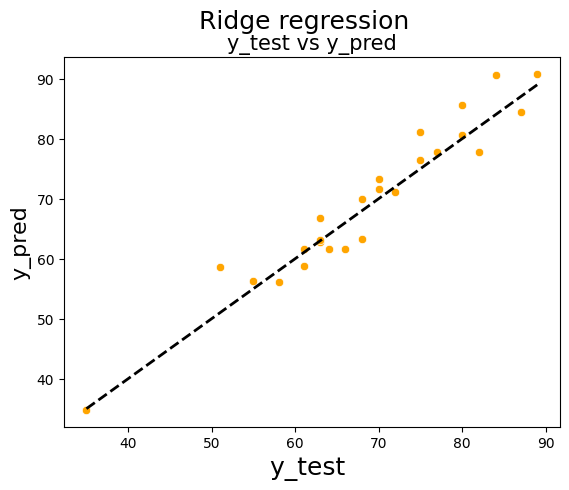

In [47]:
fig = plt.figure()
y_pred = ridge.predict(X_test)
sns.scatterplot(x = y_test, y = y_pred, color = "orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
fig.suptitle('Ridge regression', fontsize=18)
plt.title('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test ', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Lasso regression:
nos ayuda a prevenir el sobreajuste al penalizar la magnitud total de los coeficientes.Esto permite equilibrar la precisión de ajuste del modelo y la simplicidad.Útil para evitar el sobreajuste ya que da una penalizacion a los coeficientes

In [44]:
from sklearn.linear_model import Lasso
scores1 = []
for alpha in [0.1,1.0,10.0,20.0]:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train, y_train)
  scores1.append(lasso.score(X_test, y_test))
scores1

[0.9171055271038816,
 0.8878263888036557,
 0.8690477361362227,
 0.8720363114032108]

Text(0, 0.5, 'y_pred')

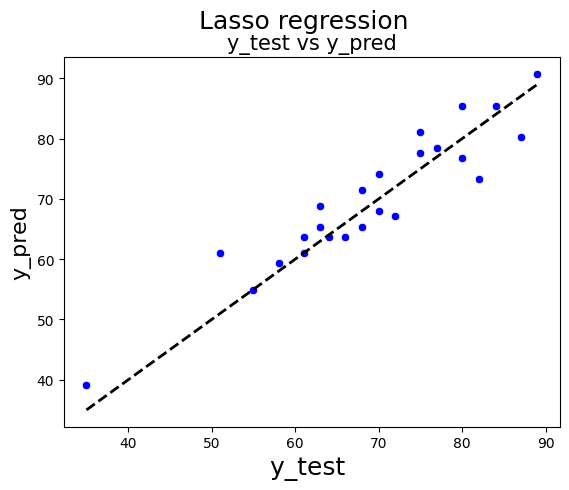

In [45]:
fig = plt.figure()
y_pred = lasso.predict(X_test)
sns.scatterplot(x = y_test, y = y_pred, color = "Blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
fig.suptitle('Lasso regression', fontsize=18)
plt.title('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test ', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Lasso regresion for feature selection:
En este caso, Lasso realiza una búsqueda cruzada para encontrar el valor óptimo de alpha, el cual controla la fuerza de la penalización. Después de ajustar el modelo, puedes examinar los coeficientes para identificar las características seleccionadas.Útil cuando se sospecha que muchas características no son informativas y se desea realizar una selección automática de características.

In [24]:
names = X.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
lasso_coef

array([-0.01475082,  0.        ,  0.        , -5.55774749, -0.        ,
       -0.07862768, -0.08156714,  0.94214958])

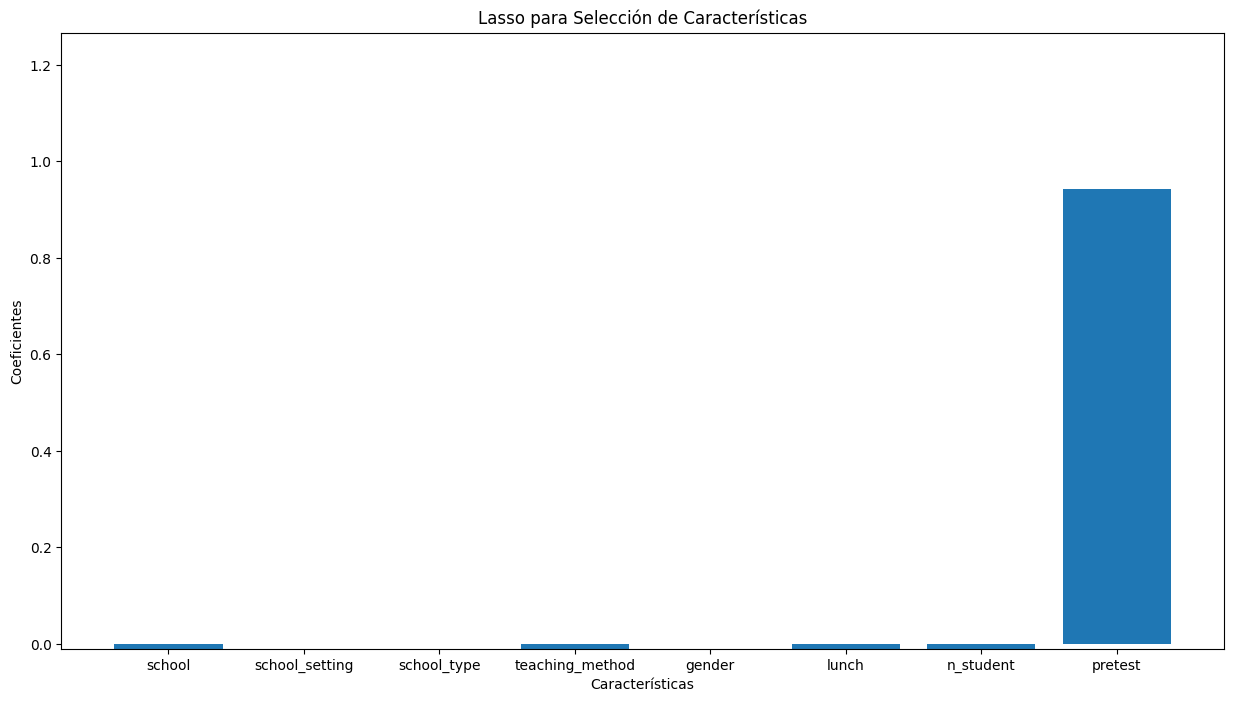

In [58]:
plt.figure(figsize=(15, 8))
plt.bar(names, lasso_coef)
plt.title('Lasso para Selección de Características')
plt.xlabel('Características')
plt.ylabel('Coeficientes')
plt.ylim(bottom=-0.01)
plt.show()